In [150]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [151]:
df = pd.read_csv("/content/spam-ham.zip")

In [152]:
pd.DataFrame(df)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [153]:
# check nan-values
df.isna().sum()

Category    0
Message     0
dtype: int64

In [154]:
df['Category']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [155]:
df["Category"] = df['Category'].map({'ham': 0, 'spam': 1})

# other way to turning ham/spam into 0/1
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit_transform(df.Category)

In [156]:
df.shape

(5572, 2)

In [157]:
pd.DataFrame(df)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [158]:
# check ofr duplicate values
df.duplicated().sum()

415

In [159]:
df = df.drop_duplicates(keep = "first")

In [160]:
df.shape

(5157, 2)

In [161]:
df.Category.value_counts()

0    4516
1     641
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6fbd91d8b0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.4187065709816749, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364083, '12.43')])

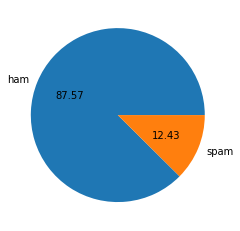

In [162]:
plt.pie(df["Category"].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")

In [163]:
import nltk

In [164]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [165]:
df['num_characters'] = df.Message.apply(len)

In [166]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [167]:
df['num_words'] = df.Message.apply(lambda x : len(nltk.word_tokenize(x)))

In [168]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [169]:
df['num_sentences'] = df.Message.apply(lambda x : len(nltk.sent_tokenize(x)))

In [170]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [171]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [172]:
# ham messages
df[df['Category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [173]:
import seaborn as sns

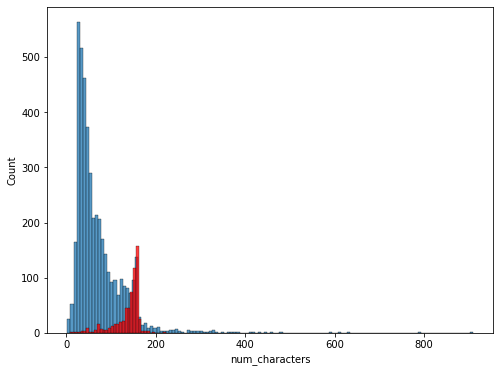

In [174]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df.Category == 0]['num_characters'])
sns.histplot(df[df.Category == 1]['num_characters'], color = "red")

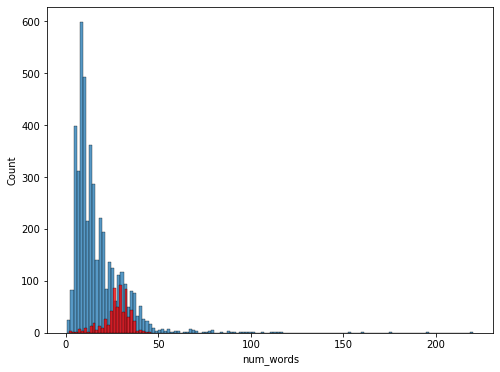

In [175]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df.Category == 0]['num_words'])
sns.histplot(df[df.Category == 1]['num_words'], color = "red")

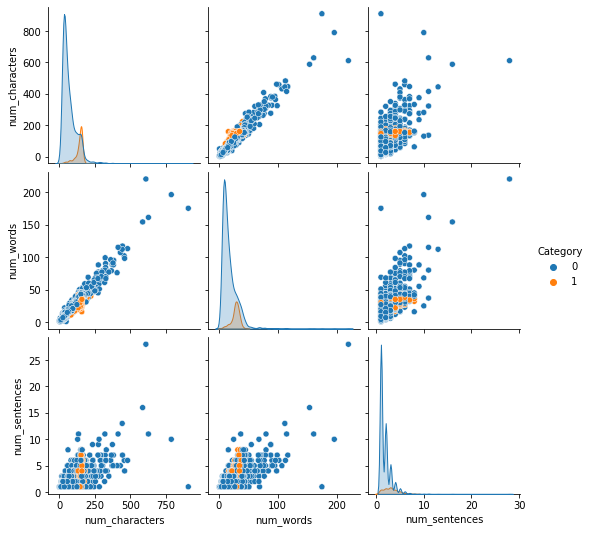

In [176]:
sns.pairplot(df, hue = "Category")

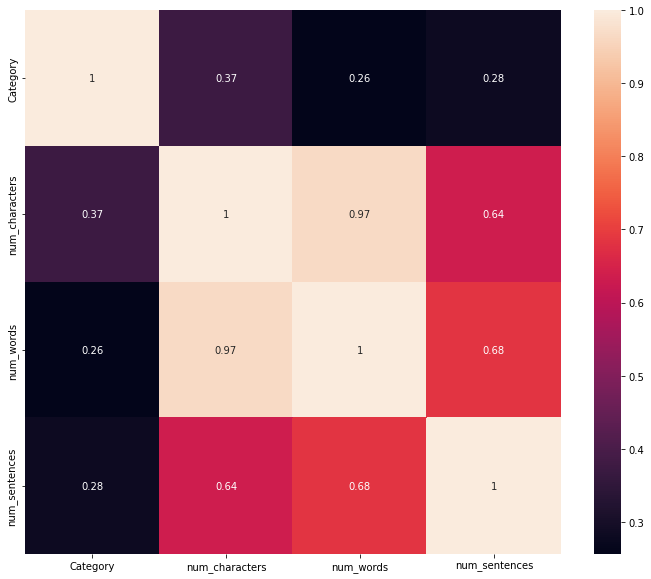

In [177]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True)

In [178]:
df.corr()

,Category,num_characters,num_words,num_sentences
Category,1.000000,0.374409,0.256038,0.281055
num_characters,0.374409,1.000000,0.966164,0.636615
num_words,0.256038,0.966164,1.000000,0.683371
num_sentences,0.281055,0.636615,0.683371,1.000000


In [179]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [180]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [181]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [182]:
def transform_text(text):
  text = text.lower()
  word_list = nltk.word_tokenize(text)
  word_list = [i for i in word_list if i.isalnum()]
  text = word_list[:]
  word_list = [i for i in word_list if i not in stopwords.words("english") and i not in string.punctuation]
  text = word_list[:]
  word_list = [ps.stem(i) for i in word_list]
  return " ".join(word_list)

In [183]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [184]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [185]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [186]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [187]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [188]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep = " "))

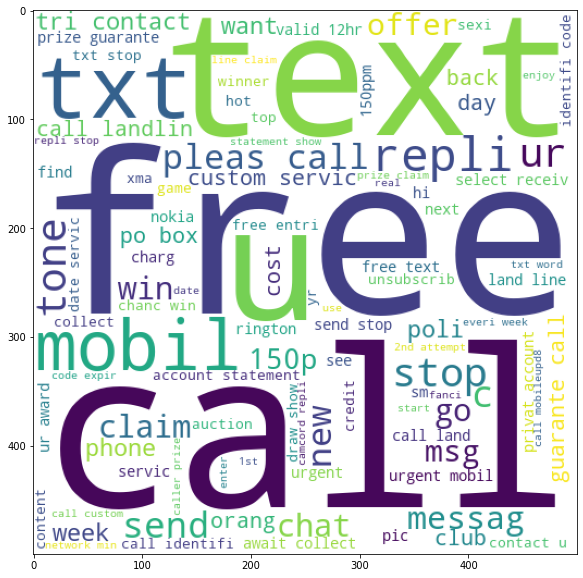

In [189]:
plt.figure(figsize = (20, 10))
plt.imshow(spam_wc)

In [190]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep = " "))

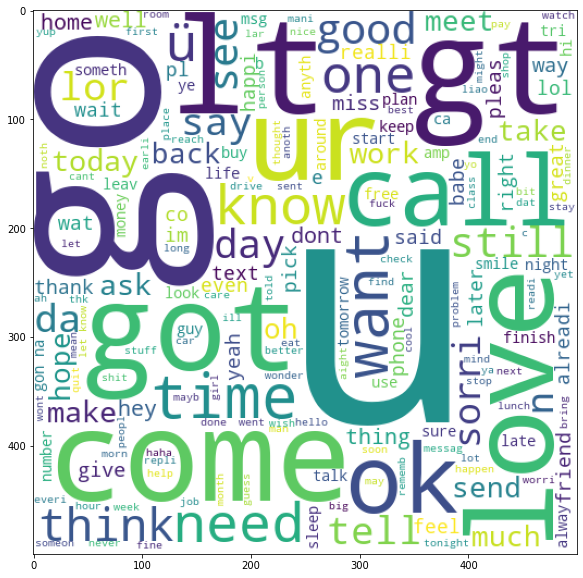

In [191]:
plt.figure(figsize = (20, 10))
plt.imshow(ham_wc)

In [192]:
from collections import Counter

spam_corpus = []

for msg in df[df['Category'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [193]:
len(spam_corpus)

9781

In [194]:
from collections import Counter

spam_corpus = [word for msg in df[df['Category'] == 1]['transformed_text'].tolist()
                    for word in msg.split()]

In [195]:
len(spam_corpus)

9781

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


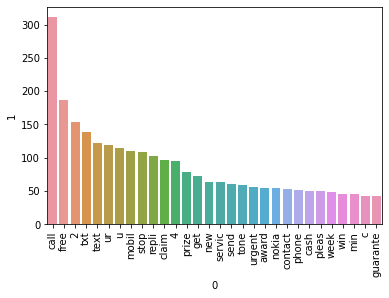

In [196]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [197]:
ham_corpus = [word for msg in df[df['Category'] == 0]['transformed_text'].tolist()
                    for word in msg.split()]

In [198]:
len(ham_corpus)

35930

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


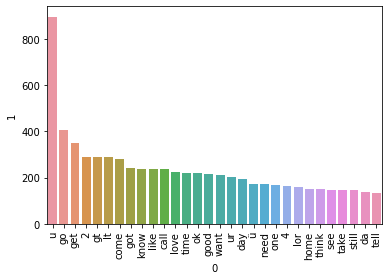

In [199]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [200]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [201]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [202]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [203]:
X.shape

(5157, 6781)

In [204]:
y = df['Category'].values

In [205]:
y.shape

(5157,)

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [208]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [209]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [210]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([0, 0, 1, ..., 0, 0, 0])

In [211]:
accuracy_score(y_test, y_pred_gnb) * 100.

86.82170542635659

In [212]:
confusion_matrix(y_test, y_pred_gnb) / 10.

array([[78.6, 11.9],
       [ 1.7, 11. ]])

In [213]:
precision_score(y_test, y_pred_gnb) * 100.

48.03493449781659

In [214]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
y_pred_mnb

array([0, 0, 0, ..., 0, 0, 0])

In [215]:
accuracy_score(y_test, y_pred_mnb) * 100.

96.12403100775194

In [216]:
confusion_matrix(y_test, y_pred_mnb) / 10.

array([[90.5,  0. ],
       [ 4. ,  8.7]])

In [217]:
precision_score(y_test, y_pred_mnb) * 100.

100.0

In [218]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([0, 0, 0, ..., 0, 0, 0])

In [219]:
accuracy_score(y_test, y_pred_bnb) * 100.

97.18992248062015

In [220]:
confusion_matrix(y_test, y_pred_bnb) / 10.

array([[90.2,  0.3],
       [ 2.6, 10.1]])

In [221]:
precision_score(y_test, y_pred_bnb) * 100.

97.11538461538461

In [222]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [223]:
model.fit(X_train, y_train, epochs = 25, verbose = 0)

In [224]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9777


[0.10492120683193207, 0.9777131676673889]

In [225]:
y_pred_tf = model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [226]:
y_pred_tf, y_test

(array([[2.6535775e-04],
        [8.1228500e-05],
        [5.6568338e-06],
        ...,
        [2.6222908e-05],
        [3.4957222e-04],
        [7.1753043e-06]], dtype=float32), array([0, 0, 0, ..., 0, 0, 0]))

In [227]:
accuracy_score(y_test, tf.round(y_pred_tf)) * 100

97.77131782945736

In [228]:
confusion_matrix(y_test, tf.round(y_pred_tf)) / 10

array([[90.2,  0.3],
       [ 2. , 10.7]])

In [229]:
precision_score(y_test, tf.round(y_pred_tf)) * 100

97.27272727272728

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [231]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [232]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [233]:
def train_classifier(classifier, X_train, X_text, y_train, y_test):
  return accuracy_score(y_test, classifier.fit(X_train, y_train).predict(X_test)), precision_score(y_test, classifier.fit(X_train, y_train).predict(X_test))

In [234]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9718992248062015, 0.9803921568627451)

In [235]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(svc, X_train, X_test, y_train, y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [236]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [237]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.971899,0.980392
1,KN,0.971899,0.980392
2,NB,0.971899,0.980392
3,DT,0.971899,0.980392
4,LR,0.971899,0.980392
5,RF,0.971899,0.980392
6,AdaBoost,0.971899,0.980392
7,BgC,0.971899,0.980392
8,ETC,0.971899,0.980392
9,GBDT,0.971899,0.980392


In [238]:
performance_df_melt = pd.melt(performance_df, id_vars = "Algorithm")

In [239]:
performance_df_melt

,Algorithm,variable,value
0,SVC,Accuracy,0.971899
1,KN,Accuracy,0.971899
2,NB,Accuracy,0.971899
3,DT,Accuracy,0.971899
4,LR,Accuracy,0.971899
5,RF,Accuracy,0.971899
6,AdaBoost,Accuracy,0.971899
7,BgC,Accuracy,0.971899
8,ETC,Accuracy,0.971899
9,GBDT,Accuracy,0.971899


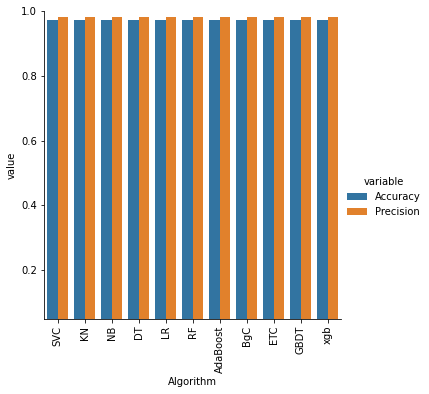

In [240]:
sns.catplot(x = "Algorithm", y = "value",
            hue = "variable", data = performance_df_melt, kind = "bar", height = 5)
plt.ylim(.05, 1.)
plt.xticks(rotation = "vertical")
plt.show()

In [241]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

In [243]:
from joblib import dump, load

In [250]:
dump(model, '/content/model.joblib')

['/content/model.joblib']

In [252]:

dump(tfidf, '/content/tfidf.joblib')

['/content/tfidf.joblib']

In [253]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))